In [1]:
#Import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# Read data using pandas

In [3]:
df = pd.read_csv('~/Documents/tesi/thesis_notebooks/input_datasets/Z_boson.csv') # read csv file
df['class'] = df['class'].map({'Zee': 0, 'Zmumu': 1}) # convert into numeric
df = df.drop(['Unnamed: 0'], axis=1) # remove unwanted column
df.head() 

,Run,Event,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,166784,20257329,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,1
1,163261,64679856,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,0
2,165570,196860468,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,0
3,172163,497791581,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,0
4,173692,550966077,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,1


**There are 20,000 rows in the dataset with 10 features and a target output (class), and there are no NaN values.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     20000 non-null  int64  
 1   Event   20000 non-null  int64  
 2   pt1     20000 non-null  float64
 3   eta1    20000 non-null  float64
 4   phi1    20000 non-null  float64
 5   Q1      20000 non-null  int64  
 6   pt2     20000 non-null  float64
 7   eta2    20000 non-null  float64
 8   phi2    20000 non-null  float64
 9   Q2      20000 non-null  int64  
 10  class   20000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.7 MB


**Target (class): there are 10,000 Zee (or 0) and Zmumu (or 1) events in the chart below. In this case, the dataset is balanced with two possible outcomes.**

<Axes: xlabel='class', ylabel='count'>

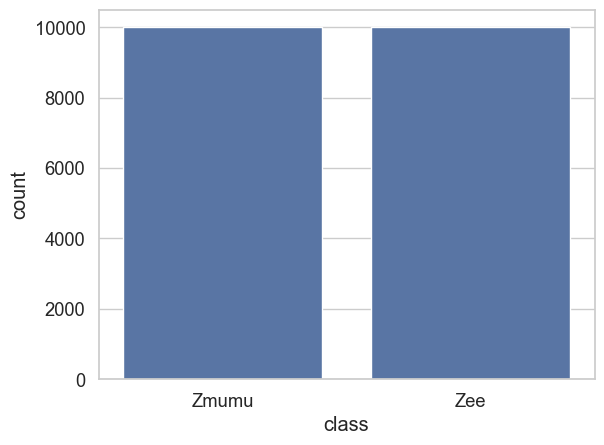

In [5]:
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
df1 = df.copy()
df1['class'] = df1['class'].map({0: 'Zee', 1: 'Zmumu'})
sns.countplot(data=df1, x="class")

# Boxplot and Outliers

An outlier is a data point that is noticeably different from the rest. Many machine learning models are easily impacted by the outliers in the training data. `Event`, `pt1`, and `pt2` are three features exhibiting outliers.

<AxesSubplot:>

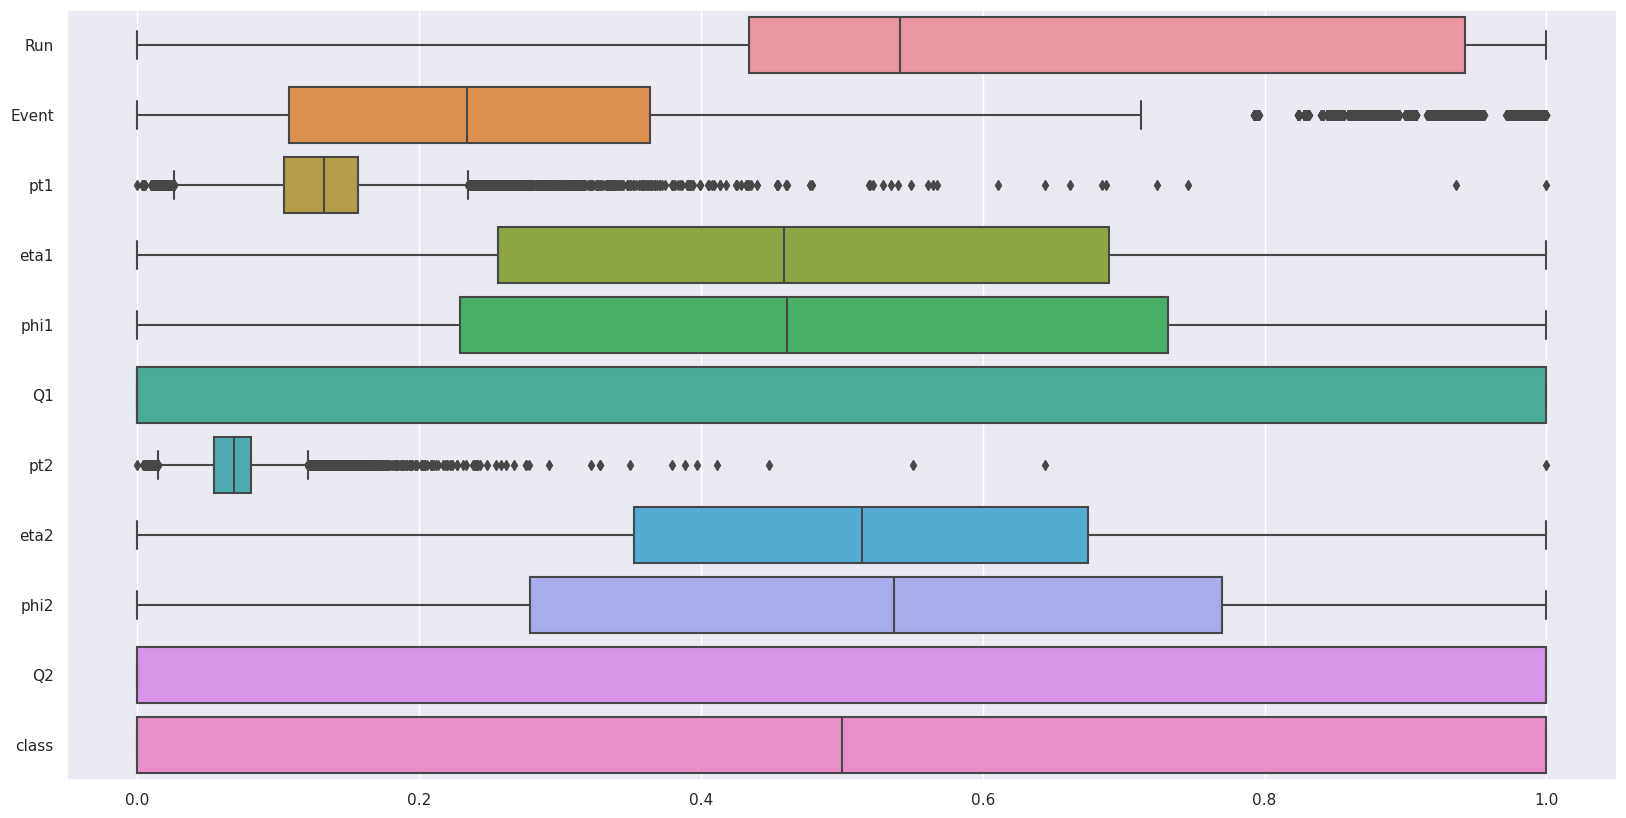

In [5]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df) # normalization
df_array_to_df = pd.DataFrame(df_scaled, columns = df.columns) # convert array into dataframe
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.0)
sns.boxplot(data=df_array_to_df, orient="h") 

The skewness is a measure of symmetry or asymmetry of data distribution. Data can be positive-skewed (data-pushed towards the right side) or negative-skewed (data-pushed towards the left side). For pt1, the skewness is between -0.5 & 0.5, so the data are nearly symmetrical. But, for pt2, the skewness is greater than 1 (positive skewed), so the data are extremely skewed. When data is skewed, the tail region may behave as an outlier for the statistical model, and outliers unsympathetically affect the model’s performance. Some statistical models are hard to outliers like Tree-based models, but it will limit the possibility of trying other models. So there is a necessity to transform the skewed data to be close enough to a Normal distribution.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


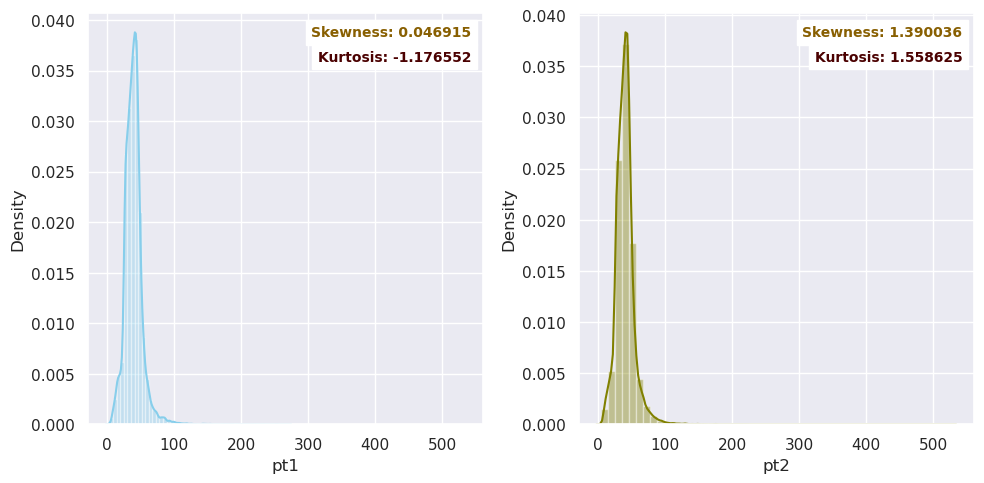

In [6]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df.iloc[:,2], color="skyblue", ax=axes[0])
sns.distplot(df.iloc[:,6], color="olive", ax=axes[1]) 
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

# Correlation heatmap

**With `Seaborn's heatmap()` function, I can determine which pairs of variables are most closely related.**

Correlation is a statistical measure that expresses the strength of the relationship between two variables. The two main types of correlation are positive and negative. Positive correlation occurs when two variables move in the same direction; as one increases, so do the other. A negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.

<AxesSubplot:>

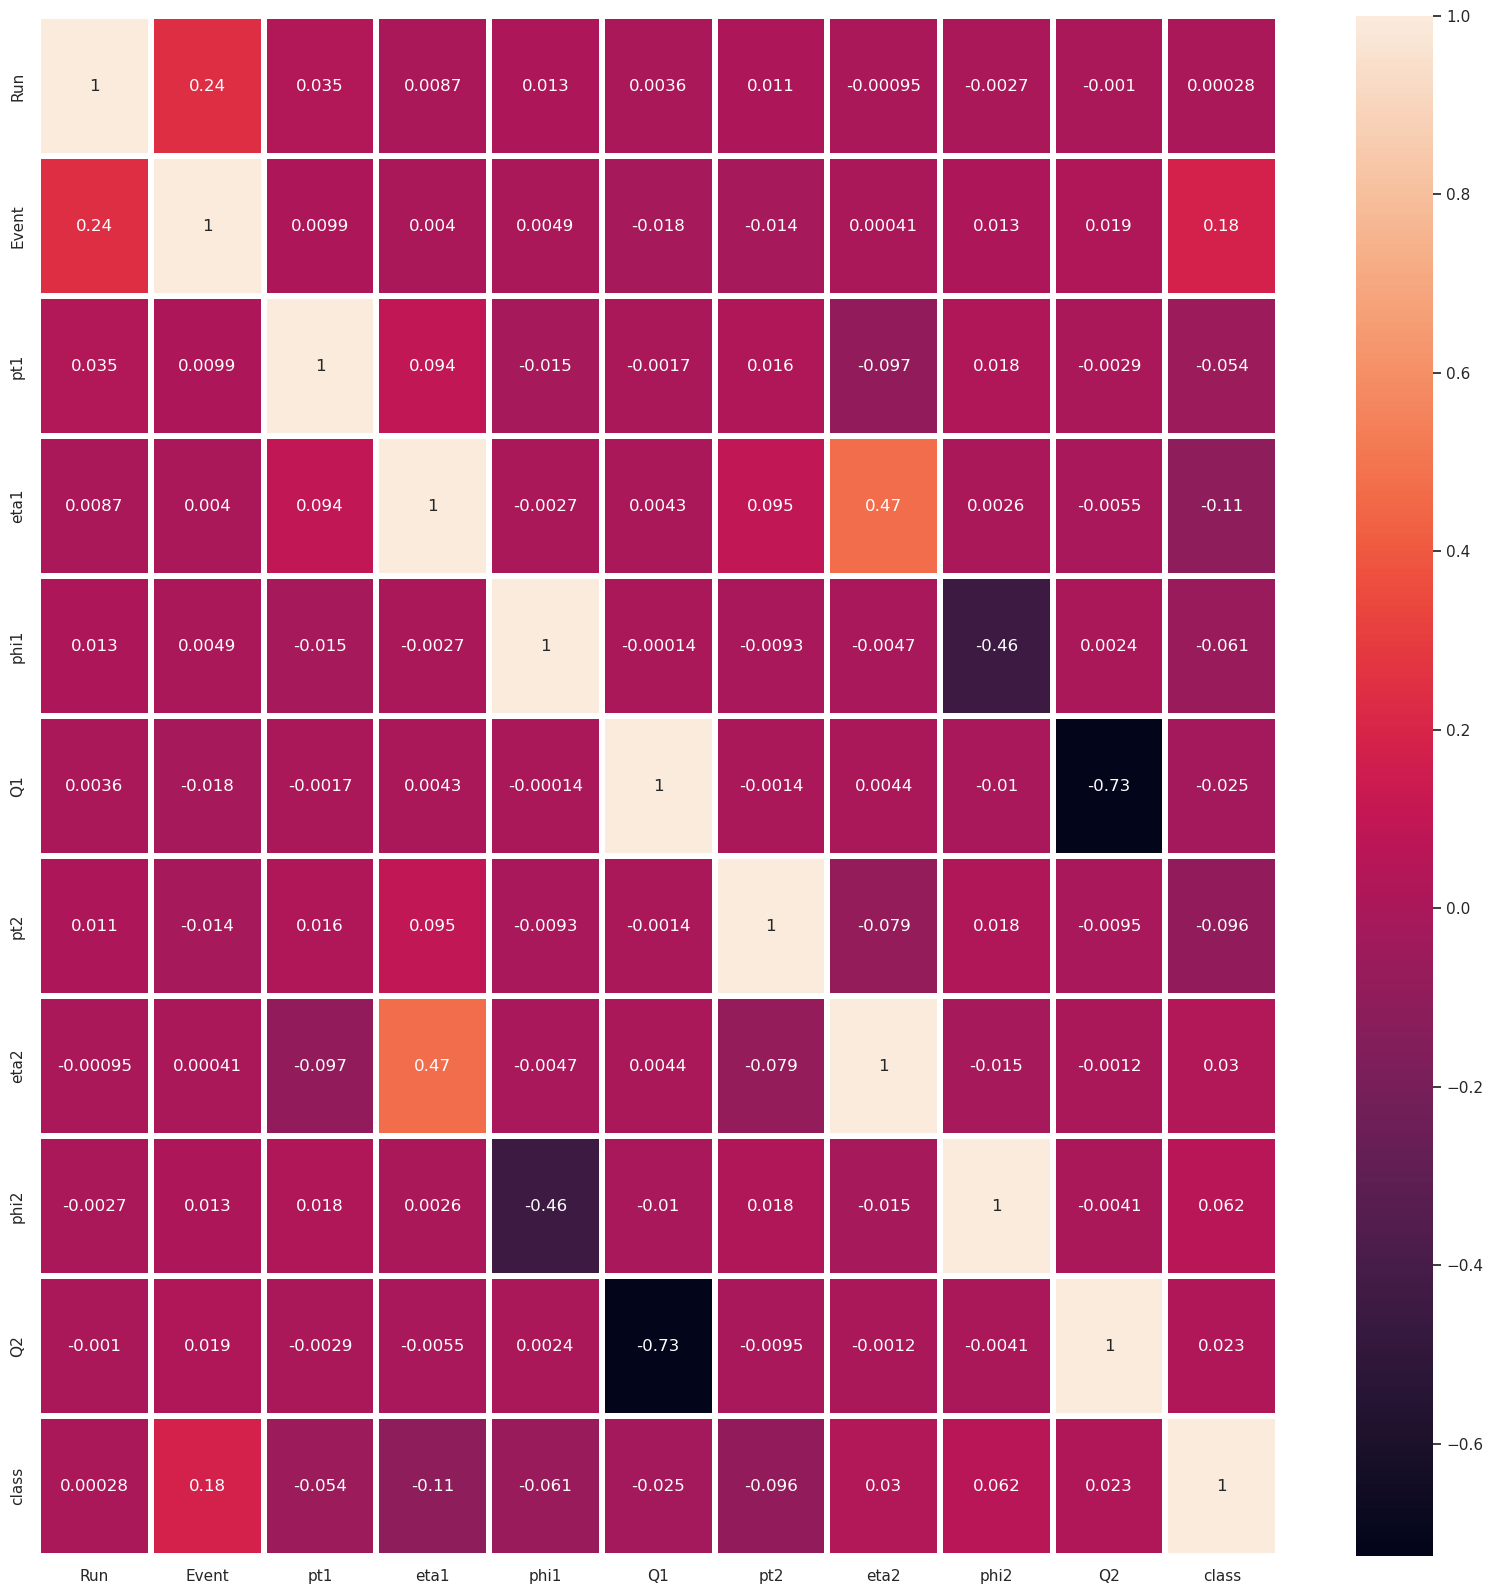

In [7]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.set(font_scale=1.0)
sns.heatmap(df.corr() , annot= True, linewidths=3, ax=ax)

# Data Visualization:

<Figure size 2000x1000 with 0 Axes>

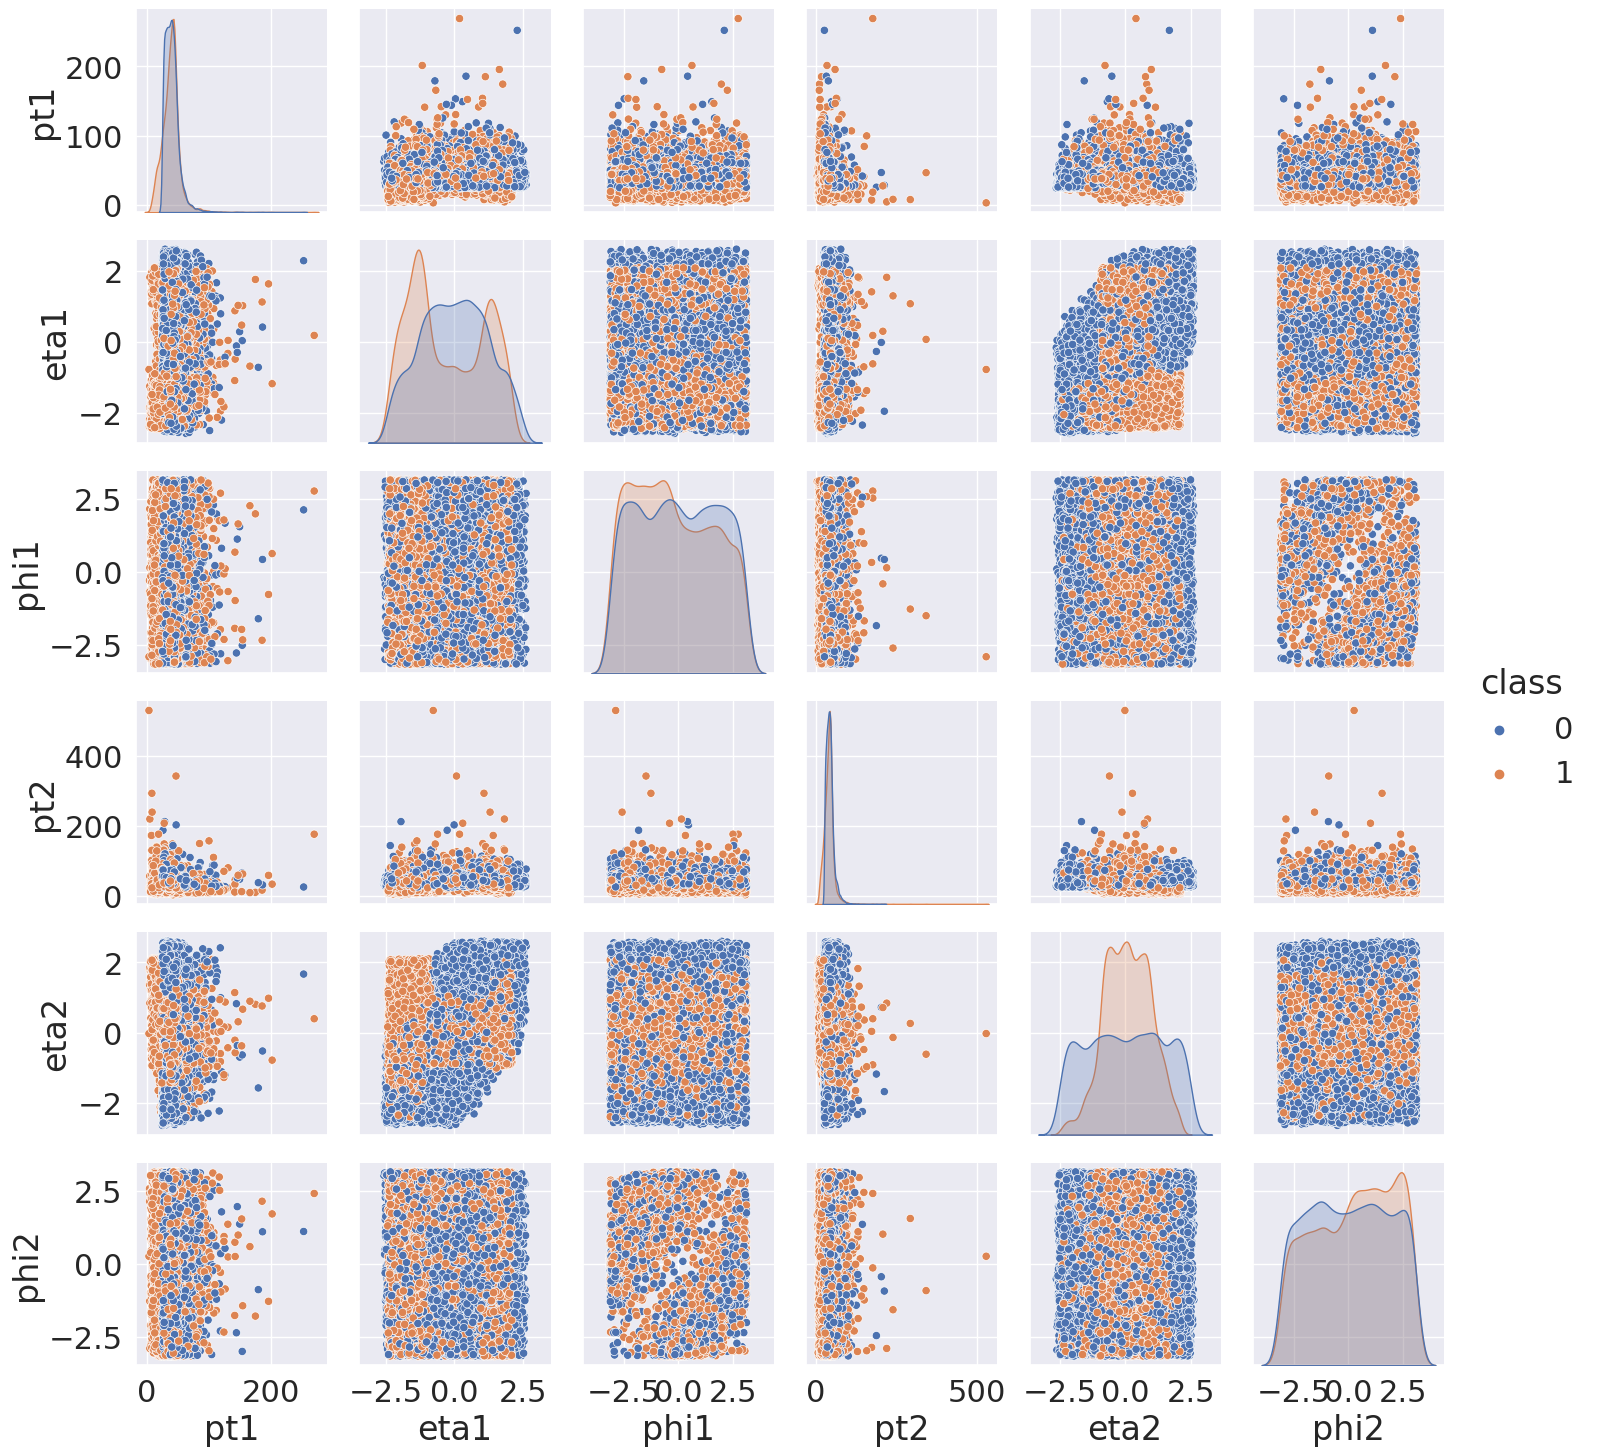

In [8]:
df1 = df[['pt1', 'eta1', 'phi1', 'pt2', 'eta2', 'phi2', 'class']]
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
sns.pairplot(df1, hue="class", palette="deep")

By default, this function will create a grid of Axes such that each numeric variable in df1 will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column. source : [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

# Feature engineering

In [9]:
df["log(pt1)"] = df.pt1.apply(np.log1p) 
df["log(pt2)"] = df.pt2.apply(np.log1p) 
df = df.drop(['pt1', 'pt2'], axis=1)  

I will then use TensorFlow and classical machine learning algorithms to build a model that allows me to distinguish between two modes (Zee and Zmumu).

**First of all, I split the DataFrame into X (data) and Y (label), where:**

In [10]:
X = df.drop(['class'], axis=1) 
y = df['class']  

**Using a train-test split, I split X and Y into train and test data.**



*   Train Dataset: Used to fit model.
*   Test Dataset: Used to evaluate the fit model.



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

**Normalization**

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNeighborsClassifier

**Using X_train and y_train, train a KNeighborsClassifier with default parameters and `n_neighbors=8`.**

In [13]:
KNClf = KNeighborsClassifier(n_neighbors = 8)  # KNClf= KNeighborsClassifier
KNClf.fit(X_train_scaled, y_train) 

KNeighborsClassifier(n_neighbors=8)

**Model Accuracy**

In [14]:
print('Accuracy of KNeighborsClassifier on train set: {:.3f}' .format(KNClf.score(X_train_scaled, y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.3f}' .format(KNClf.score(X_test_scaled, y_test)))

Accuracy of KNeighborsClassifier on train set: 0.870
Accuracy of KNeighborsClassifier on test set: 0.828


**Accuracy of KNeighborsClassifier on test set: `83.1 %` (`n_neighbors = 6`) without feature engineering**

**Accuracy of KNeighborsClassifier on test set: `82.8 %` (`n_neighbors = 8`) with feature engineering (pt2)**

**Accuracy of KNeighborsClassifier on test set: `82.8 %` (`n_neighbors = 8`) with feature engineering (pt1 + pt2)**

**Model prediction**

In order to show easily the differences between model-based prediction and real values, I create a dataframe.

In [15]:
Model_Prediction_knn = KNClf.predict(X_test_scaled)
d = {'real or true values(y_test)': y_test, 'Model_Prediction': Model_Prediction_knn} 
dfC = pd.DataFrame(data=d)
dfC = dfC.replace({0: 'Zee', 1: 'Zmumu'})
dfC.head(20) 

,real or true values(y_test),Model_Prediction
19134,Zee,Zee
4981,Zee,Zmumu
16643,Zee,Zee
19117,Zee,Zmumu
5306,Zee,Zmumu
230,Zmumu,Zmumu
3148,Zmumu,Zmumu
11525,Zee,Zee
13672,Zee,Zee
1624,Zee,Zee


# SVC

**Using X_train and y_train, train a SVC with `C = 400` and `gamma = 1`.**

In [16]:
svm = SVC(C=400, gamma=1)
svm.fit(X_train_scaled, y_train) 

SVC(C=400, gamma=1)

**Model Accuracy**

In [17]:
print('Accuracy of SVC on train set: {:.3f}' .format(svm.score(X_train_scaled, y_train)))
print('Accuracy of SVC on test set: {:.3f}' .format(svm.score(X_test_scaled, y_test)))

Accuracy of SVC on train set: 0.904
Accuracy of SVC on test set: 0.872


**Accuracy of SVC on test set: `86.6 %` without feature engineering**

**Accuracy of SVC on test set: `86.9 %` with feature engineering(pt2)**

**Accuracy of SVC on test set: `87.2 %` with feature engineering(pt1 + pt2)**

**Model prediction**

In [18]:
Model_Prediction_svm = svm.predict(X_test_scaled) 
d = {'real or true values(y_test)': y_test, 'Model_Prediction': Model_Prediction_svm} 
dfC = pd.DataFrame(data=d)
dfC = dfC.replace({0: 'Zee', 1: 'Zmumu'})
dfC.head(20) 

,real or true values(y_test),Model_Prediction
19134,Zee,Zee
4981,Zee,Zmumu
16643,Zee,Zee
19117,Zee,Zee
5306,Zee,Zmumu
230,Zmumu,Zee
3148,Zmumu,Zmumu
11525,Zee,Zee
13672,Zee,Zee
1624,Zee,Zee


# TensorFlow

The first thing I do is train a simple Neural Network using TensorFlow, and then plot accuracy and loss graphs on the training and validation datasets to find a balance between the model that is underfitting and one that is overfitting, resulting in a model with a good fit. I first need to convert the train and test data into a TensorFlow tensor.

**To convert DataFrame to a tensor, I use tf.convert_to_tensor**

In [19]:
tf.convert_to_tensor(X_train)

2023-02-17 08:59:10.399004: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-17 08:59:10.399095: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


<tf.Tensor: shape=(16000, 10), dtype=float64, numpy=
array([[ 1.65548000e+05,  6.48707483e+08,  1.61570000e+00, ...,
         1.00000000e+00,  3.94321349e+00,  3.95801688e+00],
       [ 1.66438000e+05,  3.02651184e+08, -2.18180000e+00, ...,
         1.00000000e+00,  3.73718617e+00,  3.76860057e+00],
       [ 1.66895000e+05,  9.42911570e+07, -1.90560000e+00, ...,
        -1.00000000e+00,  2.67287888e+00,  3.18169719e+00],
       ...,
       [ 1.66841000e+05,  8.55049598e+08, -5.80300000e-01, ...,
         1.00000000e+00,  3.98008531e+00,  3.45675507e+00],
       [ 1.67807000e+05,  1.12731745e+09,  1.87890000e+00, ...,
         1.00000000e+00,  3.75087960e+00,  2.53206056e+00],
       [ 1.70759000e+05,  3.91745013e+08, -8.99600000e-01, ...,
         1.00000000e+00,  3.46786177e+00,  3.60651906e+00]])>

In [20]:
tf.convert_to_tensor(X_test)

<tf.Tensor: shape=(4000, 10), dtype=float64, numpy=
array([[ 1.67830000e+05,  2.30720986e+08, -1.00320000e+00, ...,
        -1.00000000e+00,  3.63812286e+00,  3.88974672e+00],
       [ 1.63237000e+05,  1.00349630e+07,  1.30400000e+00, ...,
         1.00000000e+00,  3.35486370e+00,  4.04328808e+00],
       [ 1.73406000e+05,  2.28414501e+08,  4.99000000e-02, ...,
         1.00000000e+00,  3.45788328e+00,  3.28284543e+00],
       ...,
       [ 1.65617000e+05,  1.09972750e+08,  1.24170000e+00, ...,
         1.00000000e+00,  4.02405621e+00,  3.64405990e+00],
       [ 1.72163000e+05,  5.01236827e+08,  1.48760000e+00, ...,
         1.00000000e+00,  3.38573174e+00,  3.77769587e+00],
       [ 1.67098000e+05,  1.95070668e+08, -1.44460000e+00, ...,
        -1.00000000e+00,  3.28557326e+00,  3.90766753e+00]])>

**Normalize X_train, X_test**

In [21]:
X_train_scaled = tf.keras.layers.Normalization(axis=-1)
X_train_scaled.adapt(X_train)

In [22]:
X_test_scaled = tf.keras.layers.Normalization(axis=-1)
X_test_scaled.adapt(X_test)

**Building a simple neural network model**

The compile function takes three arguments: optimizer, loss, and metrics.



*   **Optimizer**: These are certain algorithms that are used to change the attributes of the neural network to decrease the loss rate.
*   **Loss**: This is used to compute the quantity that a model should seek to minimize during training.


*   **Metrics**: This is used to judge the performance of the model.

**Model: There are two hidden layers, each with `64 neurons` and an activation function of `sigmoid`, `epochs = 600`, and `batch_size = 100`.**





In [23]:
def get_basic_model():
  model = tf.keras.Sequential([
    X_train_scaled,
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax) 
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model
model = get_basic_model()
history = model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/600
160/160 [==============================] - 1s 4ms/step - loss: 0.6753 - accuracy: 0.5694 - val_loss: 0.6573 - val_accuracy: 0.5935
Epoch 2/600
160/160 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5905 - val_loss: 0.6555 - val_accuracy: 0.5875
Epoch 3/600
160/160 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.5911 - val_loss: 0.6530 - val_accuracy: 0.5997
Epoch 4/600
160/160 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.5878 - val_loss: 0.6522 - val_accuracy: 0.5990
Epoch 5/600
160/160 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.5920 - val_loss: 0.6513 - val_accuracy: 0.6028
Epoch 6/600
160/160 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.5919 - val_loss: 0.6516 - val_accuracy: 0.5930
Epoch 7/600
160/160 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.5944 - val_loss: 0.6522 - val_accuracy: 0.5853

**Evaluating the model**

I create plots from the collected history data.



*   A plot of accuracy on the training and validation datasets over training epochs.
*   A plot of loss on the training and validation datasets over training epochs.



125/125 - 0s - loss: 0.2177 - accuracy: 0.9093 - 333ms/epoch - 3ms/step


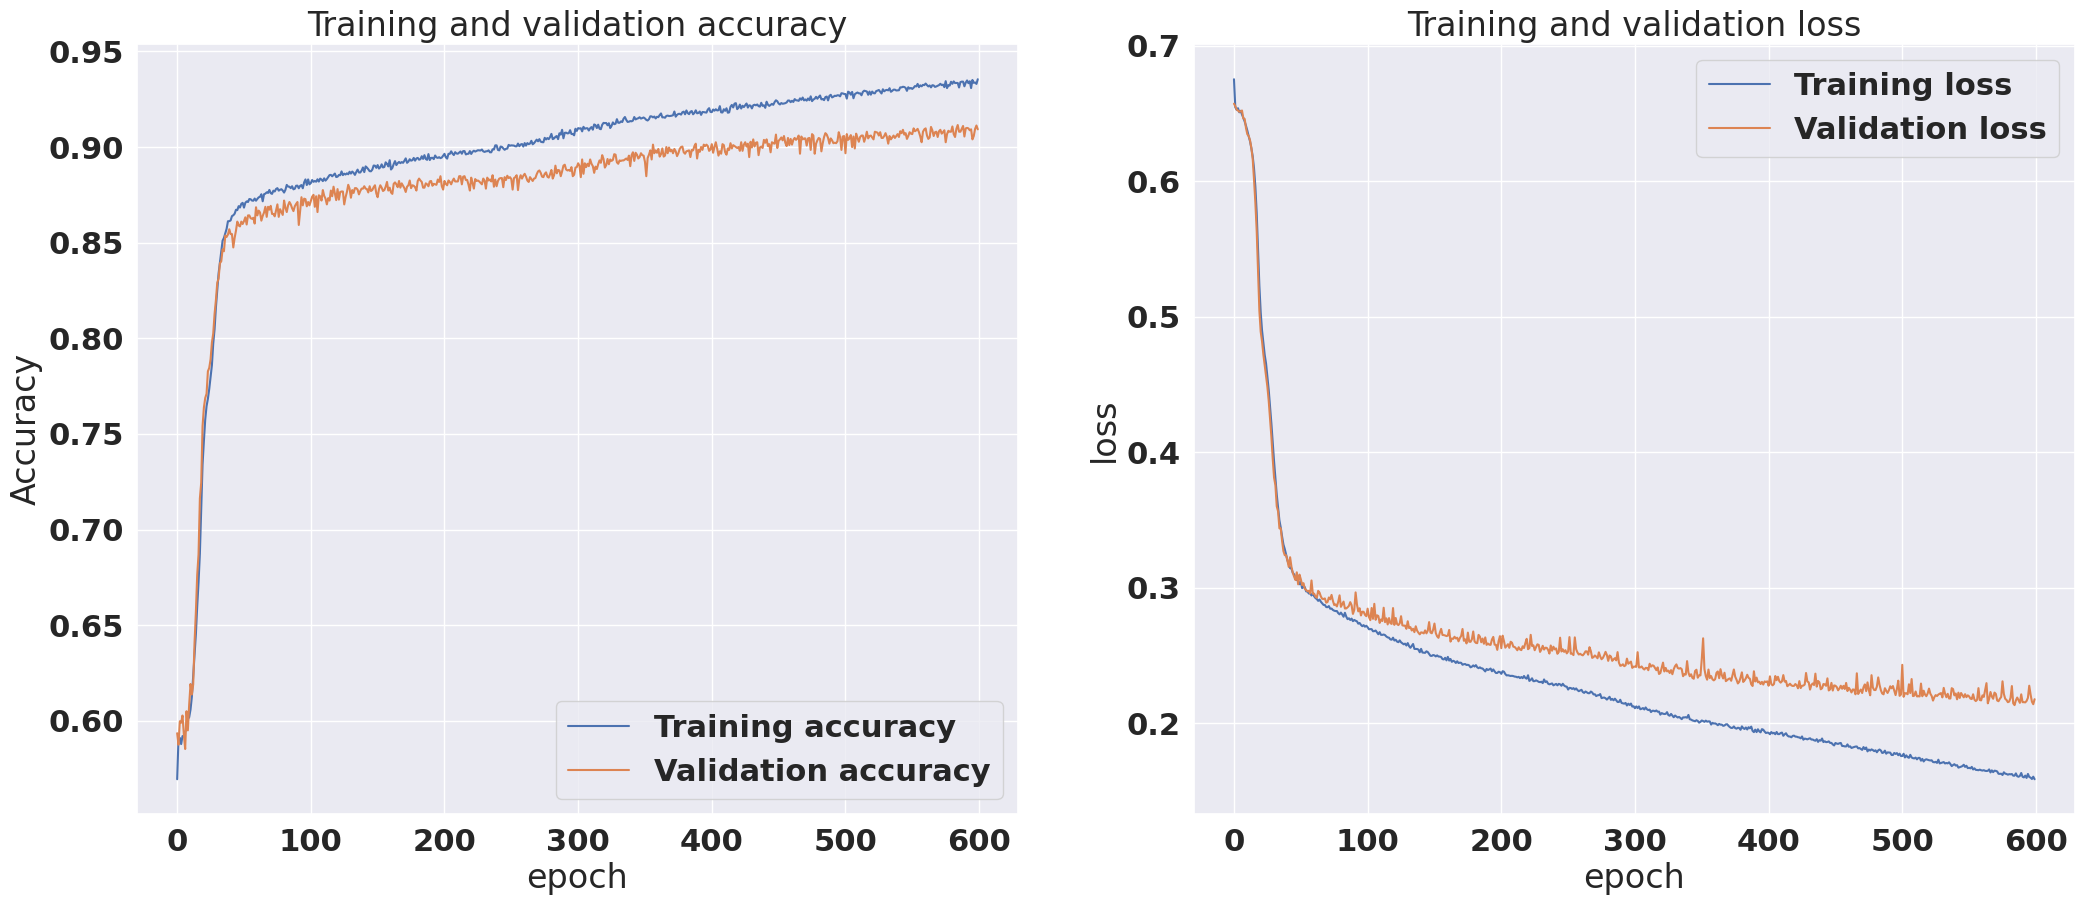

In [24]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(figsize=(25,10))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label = 'Validation accuracy') 
ax1.set_title("Training and validation accuracy")
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_title("Training and validation loss")
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(loc='upper right')
#To check the network accuracy on test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

According to the plot of loss, validation loss is decreasing before the 600th epoch, so the model is underfitting. However, after the 600th epoch, validation loss is increasing, which indicates the model is overfitting. At the 600th epoch, when the model is either perfectly fitted or in a local minimum, the neural network model achieved an accuracy of 90%. The goal of Deep Learning is to find a balance between a model that is underfitting and one that is overfitting(converging), resulting in a model with a good fit. I found an optimum where the change in the slope of loss is around the 600th epoch, as shown above. At that point, the training process can be stopped.

# Prediction

In [25]:
classifications_ = model.predict(X_test)
# Generate arg maxes for predictions
classes = np.argmax(classifications_, axis = 1)
X_test['Prediction of class'] = classes.tolist() 
X_test['real class'] = y_test.tolist() 
df_pred = X_test[['real class', 'Prediction of class']]
df_pred = df_pred.replace({0: 'Zee', 1: 'Zmumu'}) 
df_pred.head(20) 

125/125 [==============================] - 0s 1ms/step


,real class,Prediction of class
19134,Zee,Zee
4981,Zee,Zmumu
16643,Zee,Zee
19117,Zee,Zee
5306,Zee,Zee
230,Zmumu,Zmumu
3148,Zmumu,Zmumu
11525,Zee,Zee
13672,Zee,Zee
1624,Zee,Zee
